In [1]:
import pyvirtualdisplay


_display = pyvirtualdisplay.Display(visible=False,  # use False with Xvfb
                                    size=(1400, 900))
_ = _display.start()

In [2]:
!echo $DISPLAY

:1


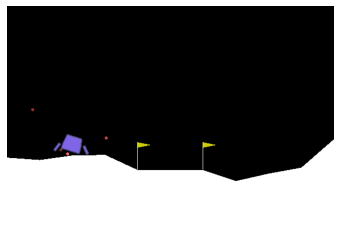

In [4]:
import typing

import gym
import matplotlib.pyplot as plt
import numpy as np
from IPython import display


# represent states as arrays and actions as ints
State = np.ndarray
Action = int

# agent is just a function! 
Agent = typing.Callable[[State], Action]


def uniform_random_policy(state: State,
                          number_actions: int,
                          random_state: np.random.RandomState) -> Action:
    """Select an action at random from the set of feasible actions."""
    feasible_actions = np.arange(number_actions)
    probs = np.ones(number_actions) / number_actions
    action = random_state.choice(feasible_actions, p=probs)
    return action


def make_random_agent(number_actions: int,
                      random_state: np.random.RandomState = None) -> Agent:
    """Factory for creating an Agent."""
    _random_state = np.random.RandomState() if random_state is None else random_state
    return lambda state: uniform_random_policy(state, number_actions, _random_state)


def simulate(agent: Agent, env: gym.Env, ax: plt.Axes) -> None:
    state = env.reset()
    img = ax.imshow(env.render(mode='rgb_array'))
    done = False
    while not done:
        action = agent(state)
        img.set_data(env.render(mode='rgb_array')) 
        ax.axis('off')
        display.display(plt.gcf())
        display.clear_output(wait=True)
        state, reward, done, _ = env.step(action)       
    env.close()
    
# create the Gym environment
lunar_lander_v2 = gym.make('LunarLander-v2')
_ = lunar_lander_v2.seed(42)

# create an agent
random_agent = make_random_agent(lunar_lander_v2.action_space.n, random_state=None)

# simulate agent interacting with the environment
_, ax = plt.subplots(1, 1)
simulate(random_agent, lunar_lander_v2, ax)